# An examination of the Cournot Model for two and multiple Firms

This project examines the Cournot competition model which is used to analyze the behaviour of firms in an duopol market. We start by deriving the model analytically for two firms and later on we solve the model numerically. At last we extend the model to include N number of firms and examine how this changes the the produced quantity of goods for the firms.


We start by importing our class 'ModelProjectClass' which contaions the equations and methos we use to solve this model project assignment.  

In [1]:
import sympy as sm
from sympy import *

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from modelproject import ModelProjectClass

# Description of the Cournot Model

In the Cournot model the firms compete for the quantities and therefore simultaneously choose the quantity that they want to produce in order to maximize their own profit. The market price depend on the quantities produced by the firm and the firm must also take the production of other firms into account.

For this Cournot Model we work with a linear demand function

$$p_i(q_i, q_j) = 1 - aq_i - bq_j$$

where $q_i$ and $q_j$ denotes the quantity of the good each firm produce, $a$ is the intercept of the demand curve and b is the slope of the demand curve meaning the elasticity of substition of the good produced

A cost function, where $c_i$ is the cost of producing one unit of the good. To simplify our model each the firms cost are symmetrical

$$c_i(q) =c_i q$$

Firm i´s maximization problem is is written as:

$$
\max_{q_i} \pi_i = (p-c)q_i
$$

# Solving the Cournot Model Analytically

<strong>Procedure </strong>
1. Defining the varibales and funtions used in the model
2. Maximizing the profits of form 1 wrt. $q_1$
3. Deriving FOC's for both firms and solving for $q_1$ and $q_2$, which gives the optimal quantity to produce for each firm

In [2]:
# Define variables used in the model
q1 = symbols('q1')
q2 = symbols('q2')
a = symbols('a')
b = symbols('b')
c = symbols('c')
MC = c

In [3]:
# Define the inverse demand function and the cost function 
def p(q1,q2):
    return 1-a* q1 - b* q2

def cost(q,MC):
    if q == 0:
        cost = 0 
    else:
        cost = MC*q
    return cost

In [4]:
# Define the profit max function of a firm with cost level c that produces output q1 while its competitor produces q2.
def profit(q1,q2,MC):
    return p(q1,q2)*q1 - cost(q1,MC)

In [5]:
# Derive the first order condition for q1
foc1 = diff(profit(q1,q2,MC),q1)
foc1

-2*a*q1 - b*q2 - c + 1

In [6]:
# Derive the first order condition for q2
foc2 = diff(profit(q2,q1,MC),q2)
foc2 

-2*a*q2 - b*q1 - c + 1

In [7]:
# In equilibrium the first order condition for both firms are equal to 0

# Solving to find the optimal quantities for each firm
opt_q = solve([foc1, foc2], [q1, q2])

# Printint the optimal quantities of q1 and q2
print("Optimal q1:")
pprint(opt_q[q1])
print("\nOptimal q2:")
pprint(opt_q[q2])

Optimal q1:
 1 - c 
───────
2⋅a + b

Optimal q2:
 1 - c 
───────
2⋅a + b


We observe that the optimal $q_1$ and $q_2$ are identical, which makes sense due to the fact that the two firms are identical

# Solving the model Numerically for a Cournot Duopol

In this section we solve the model numerically for the situation where there are two firms in the market i.e a duopol. As mentioned before, the firms in our model are identical and therefore each firm will produce an equal quantity of the good. Each firm wants to maximize its profit

<strong>Procedure </strong>
1. We start by builnding the model in the py.file
2. Setting the paramter values
3. Making an interactive plot to see how the quantity produced change as the parameters change

In [8]:
# Creating an instance of the ModelProjectClass
model = ModelProjectClass()

# Setting parameter values
n = 2
a = 10
b = 0.5
c = 2

# Calling our model from the py-file
EQ_list, n_list = model.Results(n, a, b, c)


# Itereating over the EQ_list and printing the results
for i in range(len(EQ_list)):
    print(f"When there are 2 firms in the market (duopol), the optimal quantity produced by each firm is: {EQ_list[i]:.3}, for the given values og a, b and c")

When there are 2 firms in the market (duopol), the optimal quantity produced by each firm is: 5.33, for the given values og a, b and c


## Interactive plot for a Cournot duopol

We have constructed an interactive plot to examine how the parameters $a$, $b$ and $c$ affects the optimal quantities produced. 

When changing the parameters in the interactive plot it will have the following effect:

$a$ is the maximum level of demand in the the marked (meaning the level demanded when the total quantity supplied is 0). Therefore a higher value of $a$ means that the level of demand is higher and the total quantity of goods produced is higher.

$b$ is the elasticity of substitution between the two firms. A higher value of $b$ means a higher degree of demand elasticity and therefore more competotion which brings the total quantity of goods produced down.

$c$ is the cost of producing one unit if the good. The higher the cost is, the less profitable it is for the firm to produce one more unit of the good, meaning the quantity of goods produced becomes smaller.

In [9]:
# Creating an instance of the ModelProjectClass
from ipywidgets import interact, FloatSlider
model = ModelProjectClass()

# Defining our interactive function
def interactive_plot(a, b, c):
    model.plot1(a, b, c)

# Setting startvalues
start_a = 50
start_b = 0.5
start_c = 10

# Create the interactive plot
interact(interactive_plot,
         a=FloatSlider(value=start_a, min=0, max=200, step=10, description='a'),
         b=FloatSlider(value=start_b, min=0, max=1, step=0.1, description='b'),
         c=FloatSlider(value=start_c, min=0, max=50, step=1, description='c'))

interactive(children=(FloatSlider(value=50.0, description='a', max=200.0, step=10.0), FloatSlider(value=0.5, d…

<function __main__.interactive_plot(a, b, c)>

The interactive plot show the two firms on (x-axis) and the optimal quantity each firm produce on the (y-axis). Notice that the two firms produce the same quantity no matter how the parameters are changes. As mentioned before this is due to the fact that the firms are identical.

# Extending the Cournot Model to N firms

We examine how an extending the model to include n number of firms affect the optimal quantities produced.

<strong>Procedure </strong>
1. Setting the number of firms to 20 (Notice that the higher the number of firms is, the longer time the code takes to run)
2. Plotting the number of firms against the omtimal quantity produced

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


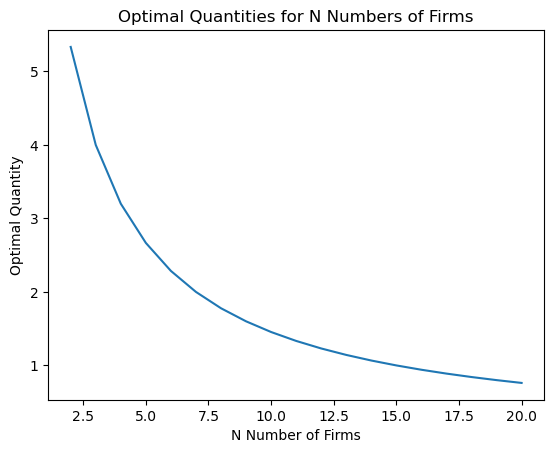

In [10]:
# Creating an instance of the ModelProjectClass
model = ModelProjectClass()

# Setting parameter values
n = 20
a = 10
b = 0.5
c = 2

# Calling our model from the py-file
EQ_list, n_list = model.Results(n, a, b, c)

# Plotting the results
model.plot2(EQ_list, n_list)

In a Cournot competition, each firm aims to maximize its profit. However, as more firms enter the market, the total profit available decreases due to intensified competition for market share. This inverse relationship is depicted in the plot, where an increase in the number of firms results in a decrease in the market share for each firm and less quantities produced. As more firms enter the market, the market share of each individual firm declines.

# Conclusion

In this assignment, we have examined the Cournot Model
First, we solved it analytically using sympy. Then we solved a Cournot doupoly numerically for the market with two firms. Additionally we examine the impact of varying the paramters $a$, $b$ and $c$. Finally we made an extension which solves the Cournot Model for any number of firms. 

We see that when the number of firms increase, the quantity produced by each firm declines. This is typical for a market characterized by oligopoly. As the number of firms increases, the total market quantity rises, leading to a decrease in market price and individual firms' profits. As more firms enter the market, the moves towards a more competitive market. 